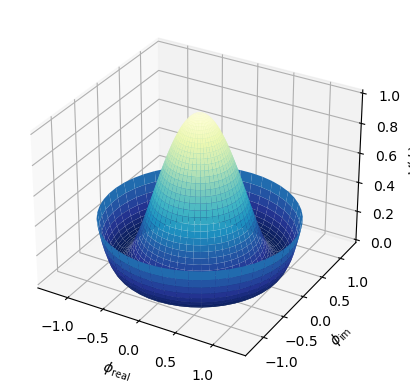

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()


# Step 1: Define constants

This section defines constants to be used in the notebook

In [4]:
# Verbosity constants
ERROR = 1
WARNING = 2

VERBOSITY_DICT = {1: "ERROR",
                  2: "WARNING"}

# Step 2: Compile functions

This section has all the necessary functions to create the surfaces based on the Zernike modes

In [15]:
def compute_zernike_polynomial(m_index, n_index, ro, varphi, verbose=False):
    """
    This function computes the value of a Zernike polynomial on polar coordinates given the Zernike coefficients
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        ro (float): The distance of the point to the center (radius in polar coordinates) 
        varphi(float): The angle of the point with respect to x-axis (angle in polar coordinates)
        
    Returns:
    """
    if not checkZernikeParameters(m_index, n_index, ro):
        return False, None
    r_value = compute_radial_value(m_index, n_index, ro)
    zernike_value = r_value * math.cos(m_index * phi)
    return zernike_value


def compute_r_value(m_index, n_index, ro):
    """
    Computes the radial polynomial at ro given m and n indexes of the Zernike Polynomials
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        ro (float): The distance of the point to the center (radius in polar coordinates)
        
    Returns:
        r_value(float): The value of the radial polynomial at ro
    """
    r_value = 0
    
    n_minus_m = m_index - n_index
    module = n_minus_m % 2
    
    if module == 0:
        total_sum = 0
        sumatory_index = (n_minus_m)//2 + 1
        for k in range(0, sumatory_index):
            numerator = (-1)**k * math.factorial(n-k)
            
            n_plus_m_d2_minus_k = (n_index + m_index)//2 - k
            n_minus_m_d2_minus_k = (n_index - m_index)//2 - k
            denominator = math.factorial(k) * math.factorial(n_plus_m_d2_minus_k) * math.factorial(n_minus_m_d2_minus_k)
            
            total_sum += numerator/denominator
            
        
def check_zernike_parameters(m_index, n_index, ro, verbose=False):
    """
    This function checks that the zernike parameters are valid
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        ro (float): The distance of the point to the center (radius in polar coordinates) 
        verbose (bool): Indicates if the errors are displayed in console. Default is False.
    
    Returns:
        bool: True if the parameters are correct, False otherwise
    """
    
    if n_index < abs(m_index):
        if verbose:
            msg = f"The n index is smaller than m index: {n_index} < {abs(m_index)}"
            print_verbose_msg(msg, ERROR)
        return False
    
    if ro < 0 or ro > 1:
        if verbose:
            msg = f"The radius (ro) must be between -1 and 1. Radius is {ro}"
            print_verbose_msg(msg, ERROR)
        return False
    
    return True
            
            
def print_verbose_msg(msg, level):
    """
    This function prints a message and its level of severity
    
    Input:
        msg (string): The message to display
        level (int): The dictionary key that contains the level of severity
    
    Returns:
        None
    """
    complete_msg = f"{VERBOSITY_DICT[level]}: {msg}"
    print(complete_msg)